In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import scipy

# Orange Trees: Non-linear growth curve

In [20]:
data = {'x' : [118, 484, 664, 1004, 1231, 1372, 1582], #Instants de mesure
        'Y' : [[30, 33, 30, 32, 30], [58, 69, 51, 62, 49], [87, 111, #Circomférences mesurées à chacun des 7 instant
            75, 112, 81], [115, 156, 108, 167, 125], [120, 172, 115, 179, 142], 
            [142, 203, 139, 209, 174], [145, 203, 140, 214, 177]],
        'Y_T' : [[30, 58, 87, 115, 120, 142, 145], [33, 69, 111, 156, 172, 203, 203], #On transpose Y pour afficher les mesures par arbre
            [30, 51, 75, 108, 115, 139, 140], [32, 62, 112, 167, 179, 209, 214],
            [30, 49, 81, 125, 142, 174, 177]]
        }                   

Tree_amount = 5
Time_stamps = 7

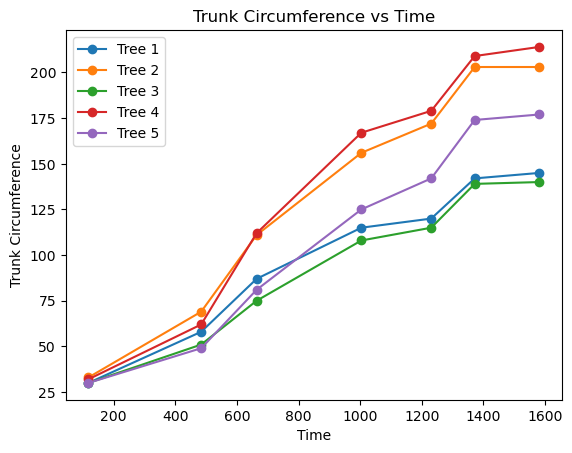

In [21]:
#Affichons les données
for i in range(Tree_amount):
    plt.plot(data['x'], data['Y_T'][i], '-o', label='Tree '+str(i+1))
plt.legend()
plt.xlabel('Time')
plt.ylabel('Trunk Circumference')
plt.title('Trunk Circumference vs Time')
plt.show()

In [ ]:
def MH(nchain, data, init):
    print('test')

In [ ]:
#Données d'initialisation (seront utiles pour l'éxécution de l'algorithme)
#theta <- structure(c(5, 5, 5, 5, 5,
#                2, 2, 2, 2, 2,
#		-6, -6, -6, -6, -6), 
#      .Dim = c(5, 3))
#mu <- c(5, 2, -6)
#tau <- c(20, 20, 20)
#tau_C <- 20

## Ancien sujet : Hearts

(On a changé de sujet finalement, on laisse ce code ici juste pour le moment)

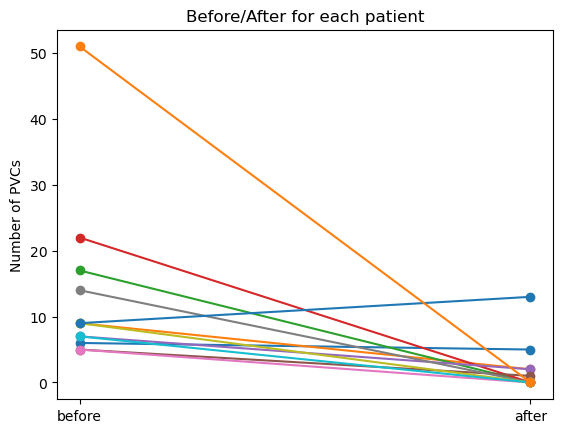

In [12]:
# The Data
data = pd.DataFrame({'x' : [6, 9, 17, 22, 7, 5, 5, 14, 9, 7, 9, 51],
                    'y' : [5, 2, 0, 0, 2, 1, 0, 0, 0, 0, 13, 0],
                    't' : [11, 11, 17, 22, 9, 6, 5, 14, 9, 7, 22, 51]})
N = 12 # Numbers of patients
# alpha <- 0
# delta <- 0

x = ["before", 'after']
for i in range(N):
    plt.plot(x, [data['x'][i], data['y'][i]], 'o-')
plt.ylabel('Number of PVCs')
plt.title('Before/After for each patient')
plt.show()

In [13]:
# J'ai fait n'importe quoi 

def cond_law_theta(theta, N, x) :
    first = theta**(N+np.sum(x))*(1-theta)**(N-np.sum(x))/(theta*(1-theta))
    second = np.exp(-(np.log(theta/(1+theta)))**2/(2*10**(-4)))
    return first*second

def cond_law_p(p, y, t) :
    first = p**(np.sum(y))*(1-p)**(np.sum(t-y))/(p*(1-p))
    second = np.exp(-(np.log(p/(1+p)))**2/(2*10**(-4)))
    return first*second

def heart(data, priors_parameters, init_chain, prop_sd, nchain) :

    chain = np.zeros((3,nchain +1)) #theta, p
    s = np.zeros((12, nchain+1)) # latent variable (state of a patient : cure/ not cure)
    chain[0] = init_chain

    x = data['x']
    y = data['y']
    t = data['t']
    N = 12

    for idx in range(nchain+1) :
        current = chain[idx]
        theta = current[0]
        p = current[1]
        s_t = s[idx]

        # Udapte the latent variable
        for i in range(12) :
            #if s_t[i]
        
        s[idx +1] = s_t
            
        # Udapte theta with MH
        prop_theta = np.random.normal(loc = 0, scale = prop_sd[0])
        z = theta + prop_theta
        ratio  = cond_law_theta(z, N, x) / cond_law_theta(theta, N, x)
        u = np.random.uniform()
        if u < ratio : 
            theta = z

        # Udapte p with MH
        prop_p = np.random.normal(loc = 0, scale = prop_sd[1])
        z = p + prop_p
        ratio = cond_law_p(z, y, t) / cond_law_p(p, y, t)
        u = np.random.uniform()
        if u < ratio : 
            p = z

        chain[idx +1] = [theta, p]



        




IndentationError: expected an indented block after 'for' statement on line 31 (2996963620.py, line 34)